In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
stock = pd.read_csv("C:/Users/rudal/OneDrive/Ai/stock.csv")
sk_stock = stock[stock['종목명'] == 'SK하이닉스']
print(sk_stock.head())

            일자     종목코드     종목명      거래량      시가      고가      저가      종가
200   20210601  A000660  SK하이닉스  2819179  127000  129000  126000  128500
2200  20210602  A000660  SK하이닉스  2885654  128500  129000  125500  126000
4200  20210603  A000660  SK하이닉스  3353993  127000  130000  126500  129000
6200  20210604  A000660  SK하이닉스  2555891  127500  129000  126500  128500
8200  20210607  A000660  SK하이닉스  2562918  129500  130000  128000  128500


In [6]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']

In [7]:

stock['Name'].value_counts()

Name
3S         494
유화증권       494
이녹스        494
이노테라피      494
이노와이어리스    494
          ... 
바이브컴퍼니     494
바이넥스       494
바른손이앤에이    494
바른손        494
힘스         494
Name: count, Length: 2000, dtype: int64

In [8]:
stock_AJ = stock[stock['Code']=='A000660']

In [9]:
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [10]:
stock_AJ

,Date,Open,High,Low,Close,Volume
200,20210601,127000,129000,126000,128500,2819179
2200,20210602,128500,129000,125500,126000,2885654
4200,20210603,127000,130000,126500,129000,3353993
6200,20210604,127500,129000,126500,128500,2555891
8200,20210607,129500,130000,128000,128500,2562918
...,...,...,...,...,...,...
978200,20230523,99000,99000,97000,97900,2472514
980200,20230524,97400,97800,96300,97700,2097933
982200,20230525,104300,104300,101100,103500,7431586
984200,20230526,107500,110500,106100,109200,10136706


In [11]:
stock_AJ['Date'].value_counts()

Date
20210601    1
20221017    1
20221013    1
20221012    1
20221011    1
           ..
20220120    1
20220119    1
20220118    1
20220117    1
20230530    1
Name: count, Length: 494, dtype: int64

In [13]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [14]:
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx


,Open,High,Low,Volume
200,0.912127,0.914384,0.929701,0.088068
2200,0.938489,0.914384,0.920914,0.091780
4200,0.912127,0.931507,0.938489,0.117931
6200,0.920914,0.914384,0.938489,0.073366
8200,0.956063,0.931507,0.964851,0.073758
...,...,...,...,...
978200,0.420035,0.400685,0.420035,0.068710
980200,0.391916,0.380137,0.407733,0.047794
982200,0.513181,0.491438,0.492091,0.345620
984200,0.569420,0.597603,0.579965,0.496671


In [15]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.489288,0.489885,0.499552,0.121847
std,0.268807,0.264108,0.264492,0.099736
min,0.000000,0.000000,0.000000,0.000000
25%,0.269332,0.270548,0.275923,0.060636
50%,0.450791,0.443493,0.456063,0.102953
75%,0.736380,0.743151,0.745167,0.154353
max,1.000000,1.000000,1.000000,1.000000


In [16]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [17]:
window_size = 3

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.3919156414755854, 0.38013698630071896, 0.4077328646741516, 0.0477940256769914], [0.5131810193312598, 0.49143835616354203, 0.4920913883998381, 0.34561971204960096], [0.5694200351483841, 0.5976027397250041, 0.579964850614095, 0.4966708248085812]] -> [0.6086206896541231]


In [18]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 491 491


In [19]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (343, 3, 4) (343, 1)
테스트 데이터의 크기 : (148, 3, 4) (148, 1)


In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, SimpleRNN

In [21]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(3, 4)))
model.add(Dropout(0.1))
model.add(SimpleRNN(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 20)             2000      
                                                                 
 dropout (Dropout)           (None, 3, 20)             0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 2841 (11.10 KB)
Trainable params: 2841 (11.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 [==============================] - 2s 3ms/step - loss: 0.3530
Epoch 2/70
12/12 [==============================] - 0s 2ms/step - loss: 0.2118
Epoch 3/70
12/12 [==============================] - 0s 3ms/step - loss: 0.1209
Epoch 4/70
12/12 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 5/70
12/12 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 6/70
12/12 [==============================] - 0s 3ms/step - loss: 0.0302
Epoch 7/70
12/12 [==============================] - 0s 3ms/step - loss: 0.0278
Epoch 8/70
12/12 [==============================] - 0s 3ms/step - loss: 0.0248
Epoch 9/70
12/12 [==============================] - 0s 3ms/step - loss: 0.0309
Epoch 10/70
12/12 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 11/70
12/12 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 12/70
12/12 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 13/70
12/12 [==============================

In [23]:
model.evaluate(test_X, test_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.0057


0.005697597749531269

In [24]:

y_pred = model.predict(test_X)

5/5 [==============================] - 0s 1ms/step


In [25]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.005697597769743881


5/5 [==============================] - 0s 2ms/step


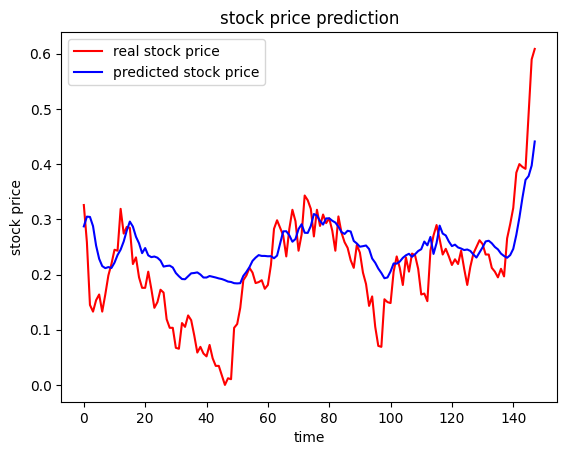

In [26]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()